<a href="https://colab.research.google.com/github/emillycfn/ANALISE-PREDITIVA/blob/main/C%C3%B3digos_Analise_preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faça o upload do arquivo chamado '25.04.22.Dados'


Saving 25.04.22.Dados.xlsx to 25.04.22.Dados.xlsx
Exibindo as 5 primeiras linhas do conjunto de dados:


,Sales,Year,Month,Weekday
Date,,,,
2022-01-01,96,2022,1,Saturday
2022-01-02,94,2022,1,Sunday
2022-01-03,75,2022,1,Monday
2022-01-04,92,2022,1,Tuesday
2022-01-05,126,2022,1,Wednesday


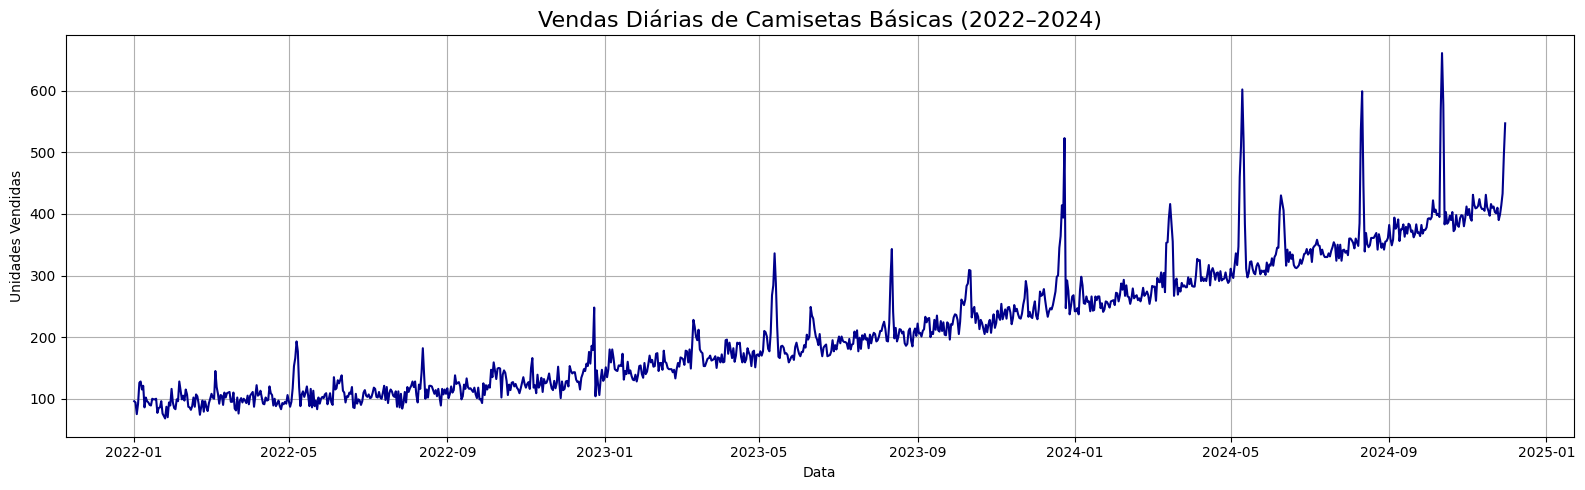

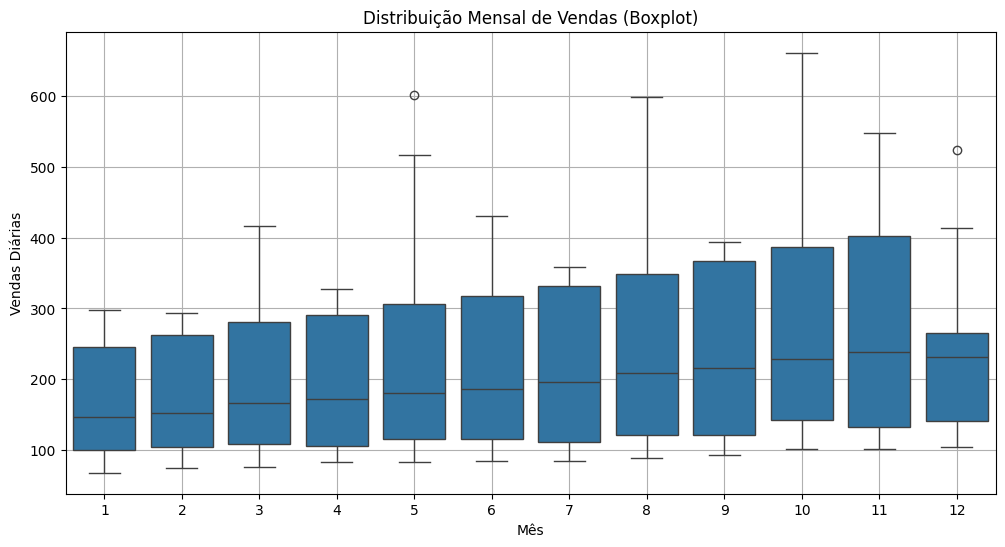

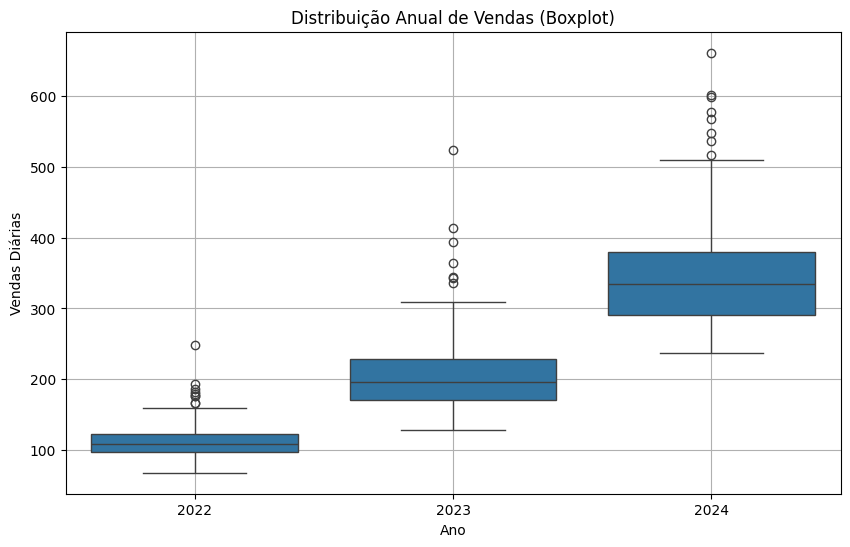

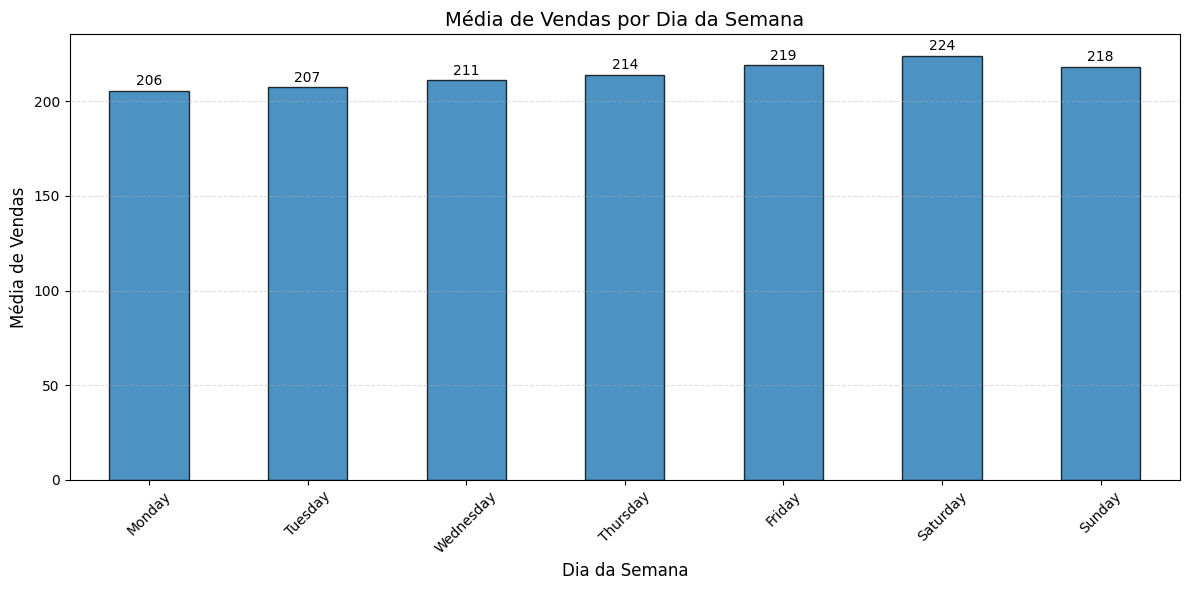

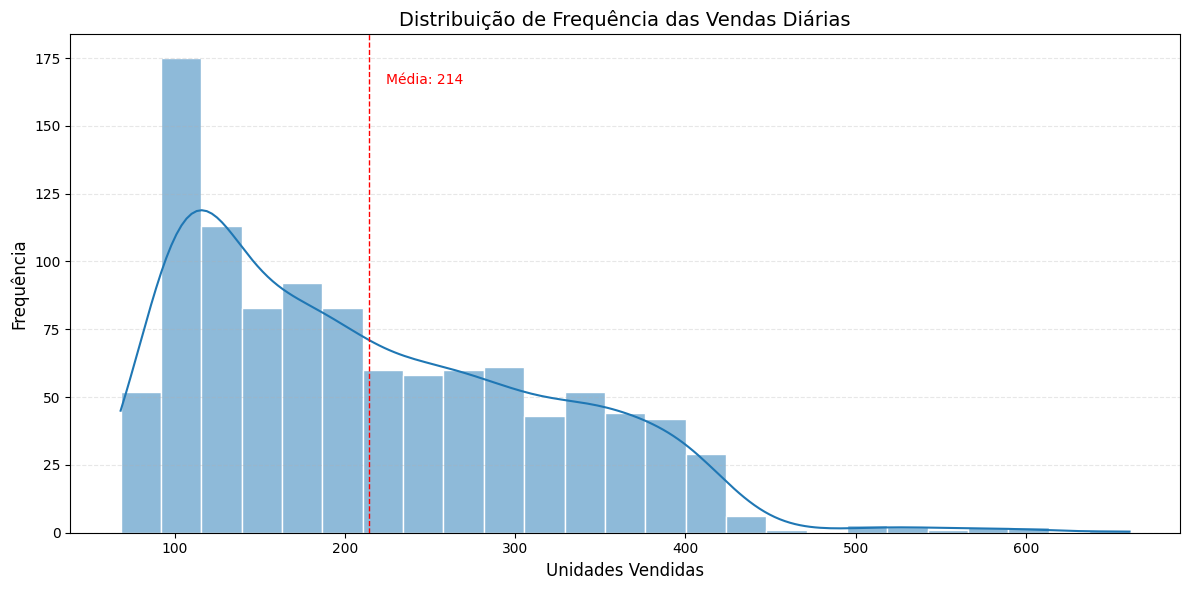

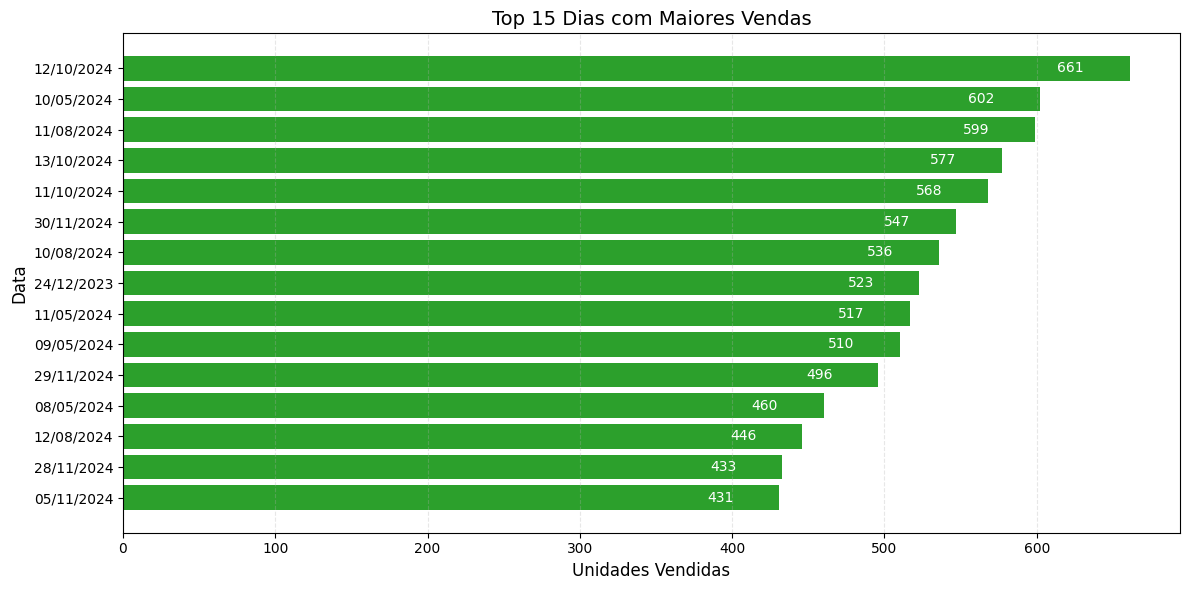

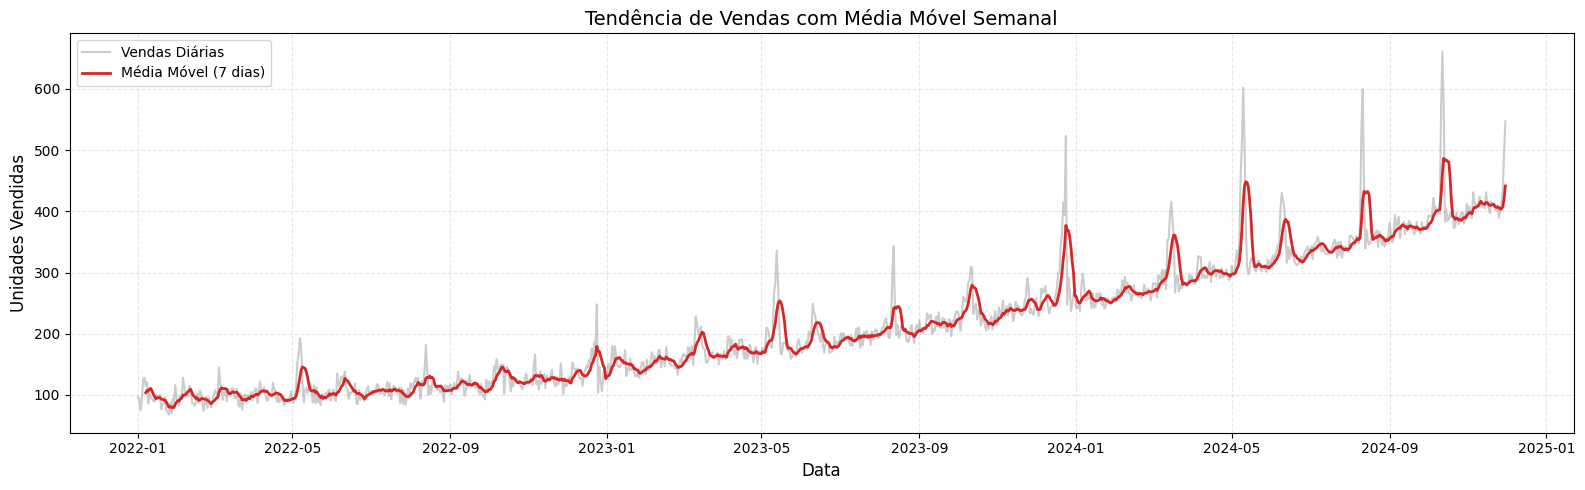

In [ ]:
# Código 1 – Análise Exploratória e Visualização Gráfica dos Dados Históricos (2022–2024)
# Instalar bibliotecas se necessário
!pip install matplotlib seaborn --quiet

# Importar bibliotecas principais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Etapa 1: Upload do arquivo
print("Faça o upload do arquivo chamado '25.04.22.Dados'")
uploaded = files.upload()

# Etapa 2: Carregar os dados
# Use the correct filename and pd.read_excel to read the Excel file
df = pd.read_excel(list(uploaded.keys())[0]) # Assuming only one file is uploaded

# Renomear colunas, se necessário
df.columns = ['Date', 'Sales']

# Converter a coluna de datas
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Etapa 3: Criar colunas auxiliares para análise
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.day_name()

# Ver os dados iniciais
print("Exibindo as 5 primeiras linhas do conjunto de dados:")
display(df.head())

# =============================================
# GRÁFICO 1 – Série Temporal Completa
# =============================================
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Sales'], color='darkblue')
plt.title('Vendas Diárias de Camisetas Básicas (2022–2024)', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Unidades Vendidas')
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================================
# GRÁFICO 2 – Boxplot por Mês
# =============================================
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Sales', data=df)
plt.title('Distribuição Mensal de Vendas (Boxplot)')
plt.xlabel('Mês')
plt.ylabel('Vendas Diárias')
plt.grid(True)
plt.show()

# =============================================
# GRÁFICO 3 – Boxplot por Ano
# =============================================
plt.figure(figsize=(10,6))
sns.boxplot(x='Year', y='Sales', data=df)
plt.title('Distribuição Anual de Vendas (Boxplot)')
plt.xlabel('Ano')
plt.ylabel('Vendas Diárias')
plt.grid(True)
plt.show()

# =============================================
# GRÁFICO 4: MÉDIA DE VENDAS POR DIA DA SEMANA
# =============================================
plt.figure(figsize=(12,6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = df.groupby('Weekday')['Sales'].mean().reindex(weekday_order)

# Configuração visual alinhada com seus gráficos anteriores
weekday_avg.plot(kind='bar', color='#1f77b4', edgecolor='black', alpha=0.8)
plt.title('Média de Vendas por Dia da Semana', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Média de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Adicionando valores nas barras
for i, v in enumerate(weekday_avg):
    plt.text(i, v+3, f"{v:.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# =============================================
# GRÁFICO 5: HISTOGRAMA DAS VENDAS DIÁRIAS
# =============================================
plt.figure(figsize=(12,6))
sns.histplot(df['Sales'], bins=25, color='#1f77b4', edgecolor='white', kde=True)

plt.title('Distribuição de Frequência das Vendas Diárias', fontsize=14)
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Linha para média
mean_sales = df['Sales'].mean()
plt.axvline(mean_sales, color='red', linestyle='--', linewidth=1)
plt.text(mean_sales+10, plt.ylim()[1]*0.9, f'Média: {mean_sales:.0f}', color='red')

plt.tight_layout()
plt.show()

# =============================================
# GRÁFICO 6: TOP 15 MAIORES PICOS DE VENDA
# =============================================
top_days = df.nlargest(15, 'Sales').sort_values('Sales')

plt.figure(figsize=(12,6))
bars = plt.barh(top_days.index.strftime('%d/%m/%Y'), top_days['Sales'], color='#2ca02c')

plt.title('Top 15 Dias com Maiores Vendas', fontsize=14)
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.ylabel('Data', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Adicionando valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width-30, bar.get_y()+bar.get_height()/2,
             f'{width:.0f}',
             ha='right', va='center', color='white')

plt.tight_layout()
plt.show()

# =============================================
# GRÁFICO 7: MÉDIA MÓVEL DE 7 DIAS
# =============================================
df['MA_7_dias'] = df['Sales'].rolling(window=7).mean()

plt.figure(figsize=(16,5))
plt.plot(df.index, df['Sales'], color='gray', alpha=0.4, label='Vendas Diárias')
plt.plot(df.index, df['MA_7_dias'], color='#d62728', linewidth=2, label='Média Móvel (7 dias)')

plt.title('Tendência de Vendas com Média Móvel Semanal', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Código 2 – Preparação dos Dados
# Importar as bibliotecas necessárias
import pandas as pd
from google.colab import files
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday

# Upload do arquivo Excel
uploaded = files.upload()

# Carregar os dados no DataFrame
df = pd.read_excel(list(uploaded.keys())[0])

# Renomear colunas para facilidade de uso
df.columns = ['Date', 'Sales']

# Converter coluna de datas em índice datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Tratamento de dados faltantes
df = df.reindex(pd.date_range(df.index.min(), df.index.max(), freq='D'))
df['Sales'] = df['Sales'].interpolate(method='linear')
df['Sales'].fillna(df['Sales'].rolling(window=7, min_periods=1).mean(), inplace=True)

# Criação de variáveis adicionais (enriquecimento dos dados)
df['Weekday'] = df.index.day_name()
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter
df['DayOfMonth'] = df.index.day
df['WeekOfYear'] = df.index.isocalendar().week

# Criação de variáveis binárias para feriados nacionais e Black Friday
class BrazilHolidays(AbstractHolidayCalendar):
    rules = [
        Holiday('Ano Novo', month=1, day=1),
        Holiday('Tiradentes', month=4, day=21),
        Holiday('Dia do Trabalho', month=5, day=1),
        Holiday('Dia das Crianças', month=10, day=12),
        Holiday('Natal', month=12, day=25),
    ]

# Aplicando calendário de feriados
holidays = BrazilHolidays().holidays(df.index.min(), df.index.max())
df['Holiday'] = df.index.isin(holidays).astype(int)

# Flag específica para Black Friday
df['BlackFriday'] = ((df.index.month == 11) &
                     (df.index.weekday == 4) &
                     (df.index.day >= 23) &
                     (df.index.day <= 29)).astype(int)

# Confirmação visual do resultado final
print("Preparação de dados concluída com sucesso!")
display(df.head(10))


Saving 25.04.22.Dados.xlsx to 25.04.22.Dados (1).xlsx
Preparação de dados concluída com sucesso!


<ipython-input-2-98897ba3304f>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].rolling(window=7, min_periods=1).mean(), inplace=True)


,Sales,Weekday,Month,Quarter,DayOfMonth,WeekOfYear,Holiday,BlackFriday
2022-01-01,96,Saturday,1,1,1,52,1,0
2022-01-02,94,Sunday,1,1,2,52,0,0
2022-01-03,75,Monday,1,1,3,1,0,0
2022-01-04,92,Tuesday,1,1,4,1,0,0
2022-01-05,126,Wednesday,1,1,5,1,0,0
2022-01-06,128,Thursday,1,1,6,1,0,0
2022-01-07,115,Friday,1,1,7,1,0,0
2022-01-08,121,Saturday,1,1,8,1,0,0
2022-01-09,86,Sunday,1,1,9,1,0,0
2022-01-10,102,Monday,1,1,10,2,0,0


Saving 25.04.22.Dados.xlsx to 25.04.22.Dados.xlsx
Tabela Completa de Previsões:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-14-3396646783.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = ExponentialSmoothing(train, trend='add').fit(smoothing_level=0.3, smoothing_slope=0.1)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

,Naive,Acumulativo,Média Móvel (7 dias),Suavização Simples,Suavização Dupla (Holt),Suavização Tripla (Holt-Winters)
Data,,,,,,
2024-12-01,547,214.157746,441.285714,470.828528,478.932440,487.985114
2024-12-02,547,214.157746,441.285714,470.828528,485.125803,474.111597
2024-12-03,547,214.157746,441.285714,470.828528,491.319167,487.907073
2024-12-04,547,214.157746,441.285714,470.828528,497.512531,493.723939
2024-12-05,547,214.157746,441.285714,470.828528,503.705895,502.144493
2024-12-06,547,214.157746,441.285714,470.828528,509.899258,525.469225
2024-12-07,547,214.157746,441.285714,470.828528,516.092622,523.233536
2024-12-08,547,214.157746,441.285714,470.828528,522.285986,530.547236
2024-12-09,547,214.157746,441.285714,470.828528,528.479350,516.673718


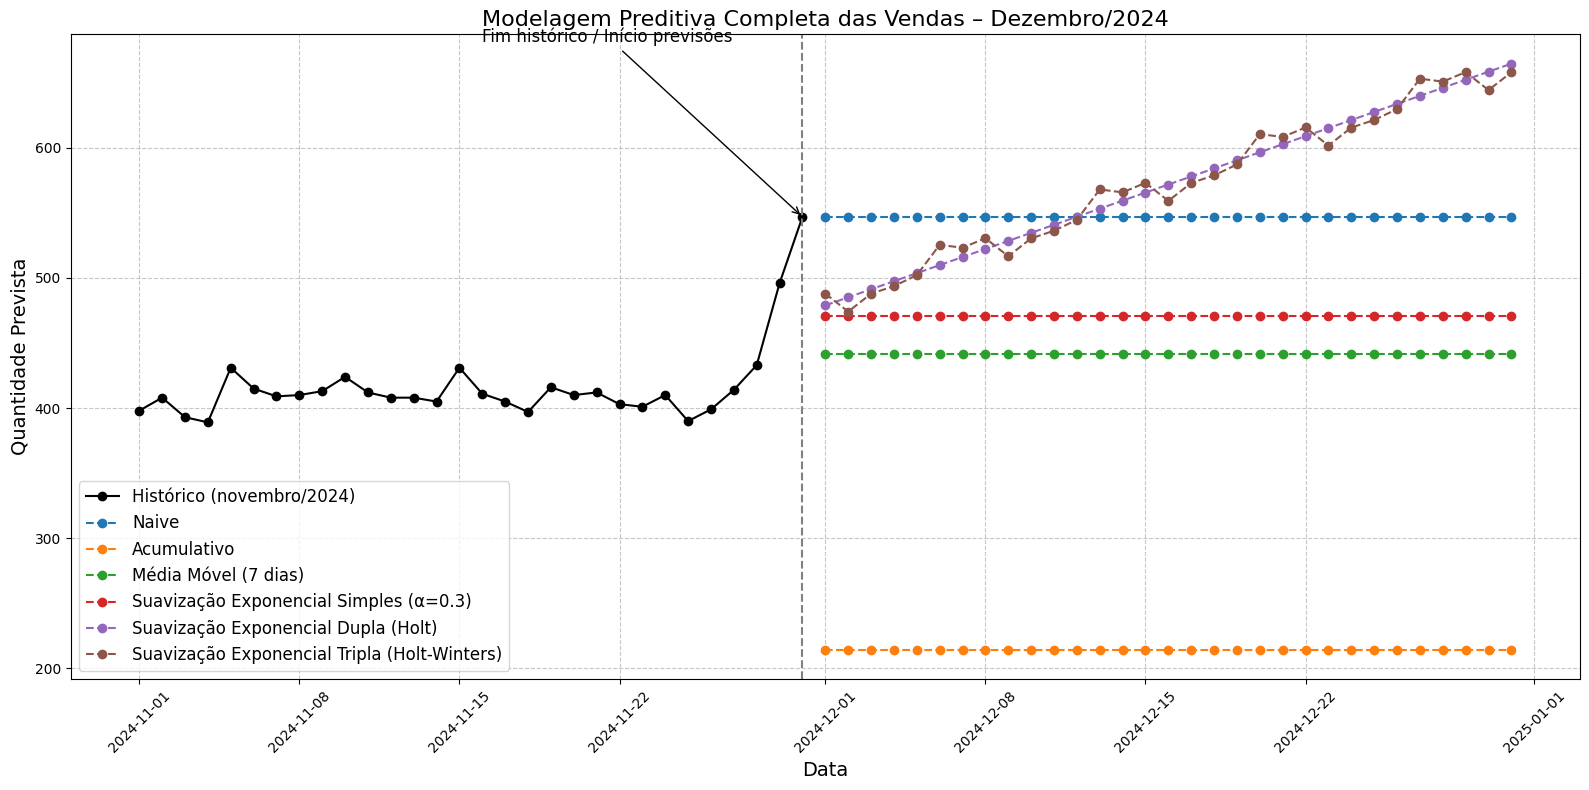

In [ ]:
# Código 3 – Modelagem Preditiva
# ===============================================
# Etapa 1 – Importação das bibliotecas necessárias
# ===============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from google.colab import files

# ===============================================
# Etapa 2 – Upload e leitura dos dados históricos
# ===============================================
uploaded = files.upload()
df = pd.read_excel(list(uploaded.keys())[0])

# Ajuste inicial dos dados
df.columns = ['Date', 'Sales']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# ===============================================
# Etapa 3 – Definir conjuntos de treino e teste
# ===============================================
train = df.loc[:'2024-11-30', 'Sales']
test_period = pd.date_range(start='2024-12-01', end='2024-12-31')

# ===============================================
# Etapa 4 – Aplicação detalhada dos modelos preditivos
# ===============================================

# 1. Modelo Naive (último valor observado)
naive_forecast = [train.iloc[-1]] * len(test_period)

# 2. Modelo Acumulativo (média geral histórica)
cumulative_forecast = [train.mean()] * len(test_period)

# 3. Modelo Média Móvel Simples (últimos 7 dias)
moving_avg_forecast = [train.iloc[-7:].mean()] * len(test_period)

# 4. Modelo Suavização Exponencial Simples (α = 0.3)
exp_model = SimpleExpSmoothing(train).fit(smoothing_level=0.3)
exp_forecast = exp_model.forecast(len(test_period))

# 5. Modelo Holt - Suavização Exponencial Dupla (tendência)
holt_model = ExponentialSmoothing(train, trend='add').fit(smoothing_level=0.3, smoothing_slope=0.1)
holt_forecast = holt_model.forecast(len(test_period))

# 6. Modelo Holt-Winters - Suavização Exponencial Tripla (tendência e sazonalidade semanal)
holt_winters_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit(
    smoothing_level=0.3, smoothing_slope=0.1, smoothing_seasonal=0.2)
holt_winters_forecast = holt_winters_model.forecast(len(test_period))

# ===============================================
# Etapa 5 – Consolidar previsões em um DataFrame
# ===============================================
forecasts_df = pd.DataFrame({
    'Data': test_period,
    'Naive': naive_forecast,
    'Acumulativo': cumulative_forecast,
    'Média Móvel (7 dias)': moving_avg_forecast,
    'Suavização Simples': exp_forecast.values,
    'Suavização Dupla (Holt)': holt_forecast.values,
    'Suavização Tripla (Holt-Winters)': holt_winters_forecast.values
})
forecasts_df.set_index('Data', inplace=True)

# Exibir tabela resultante
print("Tabela Completa de Previsões:")
display(forecasts_df)

# ===============================================
# Etapa 6 – Gráfico Completo para análise visual
# ===============================================
plt.figure(figsize=(16, 8))

# Dados históricos recentes (novembro/2024)
plt.plot(train.loc['2024-11-01':'2024-11-30'], marker='o', color='black', label='Histórico (novembro/2024)')

# Previsões futuras (dezembro/2024)
plt.plot(forecasts_df.index, forecasts_df['Naive'], marker='o', linestyle='--', label='Naive')
plt.plot(forecasts_df.index, forecasts_df['Acumulativo'], marker='o', linestyle='--', label='Acumulativo')
plt.plot(forecasts_df.index, forecasts_df['Média Móvel (7 dias)'], marker='o', linestyle='--', label='Média Móvel (7 dias)')
plt.plot(forecasts_df.index, forecasts_df['Suavização Simples'], marker='o', linestyle='--', label='Suavização Exponencial Simples (α=0.3)')
plt.plot(forecasts_df.index, forecasts_df['Suavização Dupla (Holt)'], marker='o', linestyle='--', label='Suavização Exponencial Dupla (Holt)')
plt.plot(forecasts_df.index, forecasts_df['Suavização Tripla (Holt-Winters)'], marker='o', linestyle='--', label='Suavização Exponencial Tripla (Holt-Winters)')

# Linha divisória entre histórico e previsão
plt.axvline(x=train.index[-1], color='gray', linestyle='--')

# Títulos e anotações detalhadas
plt.title('Modelagem Preditiva Completa das Vendas – Dezembro/2024', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Quantidade Prevista', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Anotação explicativa
plt.annotate('Fim histórico / Início previsões',
             xy=(train.index[-1], train.iloc[-1]),
             xytext=(train.index[-15], train.max()+20),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

plt.tight_layout()
plt.show()



In [ ]:
# Código 4 – Preparação Completa dos Dados com Variáveis Históricas (7 Lags) para Regressão Linear

# Importação das bibliotecas necessárias
import pandas as pd
from google.colab import files

# Upload do arquivo Excel fornecido pelo usuário
uploaded = files.upload()

# Carregar dados no DataFrame
df = pd.read_excel(list(uploaded.keys())[0])

# Ajustes iniciais
df.columns = ['Date', 'Sales']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Criação das variáveis históricas (lags)
for i in range(1, 8):
    df[f'Lag_{i}'] = df['Sales'].shift(i)

# Remover linhas iniciais com valores faltantes devido aos lags
df.dropna(inplace=True)

# Exibição da tabela final preparada para Regressão Linear
print("Tabela completa preparada com variáveis históricas (7 Lags):")
display(df)


Saving 25.04.22.Dados.xlsx to 25.04.22.Dados (2).xlsx
Tabela completa preparada com variáveis históricas (7 Lags):


,Sales,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
Date,,,,,,,,
2022-01-08,121,115.0,128.0,126.0,92.0,75.0,94.0,96.0
2022-01-09,86,121.0,115.0,128.0,126.0,92.0,75.0,94.0
2022-01-10,102,86.0,121.0,115.0,128.0,126.0,92.0,75.0
2022-01-11,96,102.0,86.0,121.0,115.0,128.0,126.0,92.0
2022-01-12,94,96.0,102.0,86.0,121.0,115.0,128.0,126.0
...,...,...,...,...,...,...,...,...
2024-11-26,399,390.0,410.0,401.0,403.0,412.0,410.0,416.0
2024-11-27,414,399.0,390.0,410.0,401.0,403.0,412.0,410.0
2024-11-28,433,414.0,399.0,390.0,410.0,401.0,403.0,412.0


In [ ]:
# Código 5 – Modelagem com Regressão Linear Múltipla (Previsão Dezembro/2024)

# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from google.colab import files

# Upload do arquivo preparado (completo com variáveis históricas até dezembro)
uploaded = files.upload()

# Carregar o arquivo já preparado
df = pd.read_excel(list(uploaded.keys())[0])

# Ajustes iniciais nos dados
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Separação dos dados para treino (até 30/11/2024)
train = df.loc[:'2024-11-30']

# Definição das variáveis independentes (X) e variável dependente (y)
X_train = train[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7']].astype(float)
y_train = train['Sales'].astype(float)

# Adicionar constante (intercepto)
X_train = sm.add_constant(X_train)

# Ajustar o modelo de regressão linear múltipla
model = sm.OLS(y_train, X_train).fit()

# Preparar dados para previsão (dezembro/2024)
test = df.loc['2024-12-01':'2024-12-31']
X_test = test[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7']].astype(float)
X_test = sm.add_constant(X_test)

# Realizar previsões para dezembro de 2024
forecast = model.predict(X_test)

# Mostrar previsões em DataFrame
forecast_df = pd.DataFrame({'Data': forecast.index, 'Previsão Regressão Linear': forecast.values})
forecast_df.set_index('Data', inplace=True)

# Exibir previsões
print("Previsões para Dezembro de 2024 (Regressão Linear):")
display(forecast_df)



Saving Dados_Completos_Preparados_Modelagem.xlsx to Dados_Completos_Preparados_Modelagem (2).xlsx
Previsões para Dezembro de 2024 (Regressão Linear):


,Previsão Regressão Linear
Data,
2024-12-01,521.154718
2024-12-02,496.767022
2024-12-03,477.984834
2024-12-04,468.996002
2024-12-05,468.857384
2024-12-06,477.379654
2024-12-07,484.969301
2024-12-08,486.974757
2024-12-09,484.843315


Saving Previsoes_Dezembro2024_RegressaoLinear.xlsx to Previsoes_Dezembro2024_RegressaoLinear.xlsx


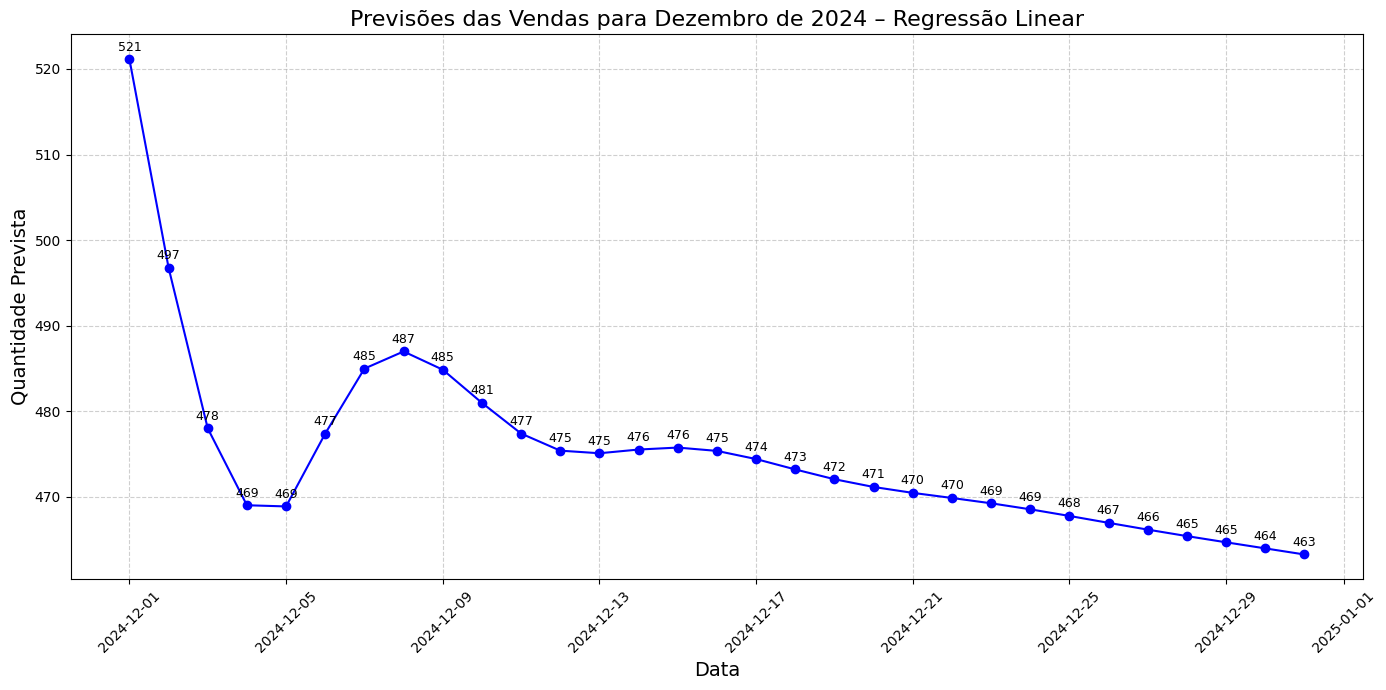

In [ ]:
# Código 6 – Gráfico das Previsões para Dezembro/2024 (Regressão Linear)

# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload do arquivo Excel com as previsões de dezembro geradas anteriormente
uploaded = files.upload()

# Carregar as previsões
df = pd.read_excel(list(uploaded.keys())[0])

# Garantir que a coluna "Data" esteja em formato datetime
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# Plotagem do gráfico
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Previsão Regressão Linear'], marker='o', linestyle='-', color='blue')

# Configuração do gráfico
plt.title('Previsões das Vendas para Dezembro de 2024 – Regressão Linear', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Quantidade Prevista', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Destacar valores no gráfico
for date, value in zip(df.index, df['Previsão Regressão Linear']):
    plt.text(date, value + 1, f'{value:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
# Código 7 – Avaliação das Métricas dos Modelos Preditivos
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.api import OLS, add_constant
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from google.colab import files

uploaded = files.upload()
df = pd.read_excel(list(uploaded.keys())[0])

# Ajuste inicial
df.columns = ['Date', 'Sales']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Divisão dos dados (novembro/2024 como exemplo real)
actual = df.loc['2024-11-01':'2024-11-30', 'Sales']

# Naive
naive_pred = actual.shift(1).dropna()

# Acumulativo
acumulativo_pred = [df['Sales'][:'2024-10-31'].mean()] * len(actual)

# Média Móvel Simples (últimos 7 dias)
media_movel_pred = actual.rolling(window=7).mean().dropna()

# Suavização Exponencial (α=0.3)
exp_smooth_model = SimpleExpSmoothing(df['Sales'][:'2024-10-31']).fit(smoothing_level=0.3)
exp_smooth_pred = exp_smooth_model.forecast(len(actual))

# Regressão Linear Múltipla
lags_df = pd.concat([df.shift(i) for i in range(1,8)], axis=1)
lags_df.columns = ['Lag_1','Lag_2','Lag_3','Lag_4','Lag_5','Lag_6','Lag_7']
lags_df['Sales'] = df['Sales']
lags_df.dropna(inplace=True)

train_lags = lags_df.loc[:'2024-10-31']
X_train = add_constant(train_lags[['Lag_1','Lag_2','Lag_3','Lag_4','Lag_5','Lag_6','Lag_7']])
y_train = train_lags['Sales']
model_rl = OLS(y_train, X_train).fit()

test_lags = lags_df.loc['2024-11-01':'2024-11-30']
X_test = add_constant(test_lags[['Lag_1','Lag_2','Lag_3','Lag_4','Lag_5','Lag_6','Lag_7']])
rl_pred = model_rl.predict(X_test)

# Alinhamento para comparação
actual_aligned = actual.loc[naive_pred.index.intersection(media_movel_pred.index).intersection(exp_smooth_pred.index).intersection(rl_pred.index)]

# Cálculo das métricas
models_preds = {
    'Naive': naive_pred.loc[actual_aligned.index],
    'Acumulativo': acumulativo_pred[:len(actual_aligned)],
    'Média Móvel Simples': media_movel_pred.loc[actual_aligned.index],
    'Suavização Exponencial': exp_smooth_pred.loc[actual_aligned.index],
    'Regressão Linear Múltipla': rl_pred.loc[actual_aligned.index]
}

metrics = {
    'Modelo': [],
    'MAPE (%)': [],
    'RMSE': [],
    'MAE': []
}

for name, pred in models_preds.items():
    metrics['Modelo'].append(name)
    metrics['MAPE (%)'].append(mean_absolute_percentage_error(actual_aligned, pred)*100)
    metrics['RMSE'].append(sqrt(mean_squared_error(actual_aligned, pred)))
    metrics['MAE'].append(mean_absolute_error(actual_aligned, pred))

metrics_df = pd.DataFrame(metrics)
print("Tabela de Avaliação dos Modelos:")
display(metrics_df)

Saving 25.04.22.Dados.xlsx to 25.04.22.Dados.xlsx
Tabela de Avaliação dos Modelos:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


,Modelo,MAPE (%),RMSE,MAE
0,Naive,3.038506,20.120471,13.500000
1,Acumulativo,50.073609,213.613136,211.043478
2,Média Móvel Simples,2.999103,27.951458,13.988095
3,Suavização Exponencial,5.044863,40.016129,23.147080
4,Regressão Linear Múltipla,3.168641,23.073707,14.302054


In [ ]:
# Código 8 - Preparação dos Dados para o Modelo KNN

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Upload dos dados com lags preparados
uploaded = files.upload()
df = pd.read_excel(list(uploaded.keys())[0])

# Ajustar coluna de datas
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Definir índice de datas claramente
df.set_index('Date', inplace=True)

# NOVAS VARIÁVEIS CRIATIVAS SUGERIDAS
# Fim de semana (sábado e domingo)
df['Fim_de_Semana'] = df.index.dayofweek.isin([5, 6]).astype(int)

# Início do mês (primeiros 7 dias)
df['Inicio_do_mes'] = (df.index.day <= 7).astype(int)

# Final do mês (últimos 7 dias)
df['Final_do_mes'] = (df.index.days_in_month - df.index.day < 7).astype(int)

# Pagamento de salários (dias 1 e 15)
df['Pagamento_salarios'] = df.index.day.isin([1, 15]).astype(int)

# Variáveis adicionais (dias da semana, mês, feriados)
df['Weekday'] = df.index.day_name()
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter
df['DayOfMonth'] = df.index.day
df['WeekOfYear'] = df.index.isocalendar().week.astype(int)

# Adicionar feriados
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday

class BrazilHolidays(AbstractHolidayCalendar):
    rules = [
        Holiday('Ano Novo', month=1, day=1),
        Holiday('Tiradentes', month=4, day=21),
        Holiday('Dia do Trabalho', month=5, day=1),
        Holiday('Dia das Crianças', month=10, day=12),
        Holiday('Natal', month=12, day=25),
    ]

holidays = BrazilHolidays().holidays(df.index.min(), df.index.max())
df['Holiday'] = df.index.isin(holidays).astype(int)

# Black Friday (última sexta-feira de novembro)
df['BlackFriday'] = ((df.index.month == 11) & (df.index.weekday == 4) &
                     (df.index.day >= 23) & (df.index.day <= 29)).astype(int)

# Codificar Weekday com variáveis dummy
df = pd.get_dummies(df, columns=['Weekday'], drop_first=True)

# Separar treino (até novembro) e teste (dezembro)
train = df[df.index <= '2024-11-30']
test = df[df.index >= '2024-12-01']

# Definir variáveis numéricas para padronização
numerical_cols = train.columns.drop('Sales')

# Aplicar StandardScaler nos dados numéricos
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[numerical_cols])
test_scaled = scaler.transform(test[numerical_cols])

# Montar DataFrames escalados finais
train_scaled_df = pd.DataFrame(train_scaled, columns=numerical_cols, index=train.index)
train_scaled_df['Sales'] = train['Sales'].values

test_scaled_df = pd.DataFrame(test_scaled, columns=numerical_cols, index=test.index)

# Mostrar resultados antes do download
print("Dados de treino preparados (últimas linhas):")
display(train_scaled_df.tail())

print("Dados de teste preparados (primeiras linhas):")
display(test_scaled_df.head())

# Salvar os dados de treino e teste em arquivos Excel
train_scaled_df.to_excel('Train_Preparado_KNN.xlsx', index=True)
test_scaled_df.to_excel('Test_Preparado_KNN.xlsx', index=True)

# Exportar dados de treino
train.to_excel('Dados_Treino_Preparados_KNN.xlsx')

# Exportar dados de teste
test.to_excel('Dados_Teste_Preparados_KNN.xlsx')

# Download direto no Colab
files.download('Dados_Treino_Preparados_KNN.xlsx')
files.download('Dados_Teste_Preparados_KNN.xlsx')

Saving Dados_Completos_Novembro_Dezembro.xlsx to Dados_Completos_Novembro_Dezembro.xlsx
Dados de treino preparados (últimas linhas):


,Fim_de_Semana,Inicio_do_mes,Final_do_mes,Pagamento_salarios,Month,Quarter,DayOfMonth,WeekOfYear,Holiday,BlackFriday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Sales
Date,,,,,,,,,,,,,,,,,
2024-11-26,-0.633495,-0.546608,1.829464,-0.265239,1.376984,1.391185,1.168018,1.503217,-0.115415,-0.053149,-0.408025,-0.409589,-0.408025,-0.408025,2.450832,-0.408025,399.0
2024-11-27,-0.633495,-0.546608,1.829464,-0.265239,1.376984,1.391185,1.281692,1.503217,-0.115415,-0.053149,-0.408025,-0.409589,-0.408025,-0.408025,-0.408025,2.450832,414.0
2024-11-28,-0.633495,-0.546608,1.829464,-0.265239,1.376984,1.391185,1.395367,1.503217,-0.115415,-0.053149,-0.408025,-0.409589,-0.408025,2.450832,-0.408025,-0.408025,433.0
2024-11-29,-0.633495,-0.546608,1.829464,-0.265239,1.376984,1.391185,1.509041,1.503217,-0.115415,18.814888,-0.408025,-0.409589,-0.408025,-0.408025,-0.408025,-0.408025,496.0
2024-11-30,1.578545,-0.546608,1.829464,-0.265239,1.376984,1.391185,1.622716,1.503217,-0.115415,-0.053149,-0.408025,2.441472,-0.408025,-0.408025,-0.408025,-0.408025,547.0


Dados de teste preparados (primeiras linhas):


,Fim_de_Semana,Inicio_do_mes,Final_do_mes,Pagamento_salarios,Month,Quarter,DayOfMonth,WeekOfYear,Holiday,BlackFriday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
Date,,,,,,,,,,,,,,,,
2024-12-01,1.578545,1.829464,-0.546608,3.770184,1.673904,1.391185,-1.673842,1.503217,-0.115415,-0.053149,-0.408025,-0.409589,2.450832,-0.408025,-0.408025,-0.408025
2024-12-02,-0.633495,1.829464,-0.546608,-0.265239,1.673904,1.391185,-1.560168,1.571226,-0.115415,-0.053149,2.450832,-0.409589,-0.408025,-0.408025,-0.408025,-0.408025
2024-12-03,-0.633495,1.829464,-0.546608,-0.265239,1.673904,1.391185,-1.446494,1.571226,-0.115415,-0.053149,-0.408025,-0.409589,-0.408025,-0.408025,2.450832,-0.408025
2024-12-04,-0.633495,1.829464,-0.546608,-0.265239,1.673904,1.391185,-1.332819,1.571226,-0.115415,-0.053149,-0.408025,-0.409589,-0.408025,-0.408025,-0.408025,2.450832
2024-12-05,-0.633495,1.829464,-0.546608,-0.265239,1.673904,1.391185,-1.219145,1.571226,-0.115415,-0.053149,-0.408025,-0.409589,-0.408025,2.450832,-0.408025,-0.408025


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Código 9 - Modelo KNN com Grid Search

# Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
from google.colab import files

# Carregar dados de treino
print("Carregue o arquivo Dados_Treino_Preparados_KNN.xlsx")
uploaded_train = files.upload()
df_train = pd.read_excel(list(uploaded_train.keys())[0])

# Carregar dados de teste (já sem a coluna 'Sales')
print("Agora carregue o arquivo Dados_Teste_Preparados_KNN.xlsx")
uploaded_test = files.upload()
df_test = pd.read_excel(list(uploaded_test.keys())[0])

# Ajustar índices
train = df_train.set_index('Date')
test = df_test.set_index('Date')

# Separação das variáveis
X_train = train.drop(columns=['Sales'])
y_train = train['Sales']

X_test = test.copy()

# Configuração do Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Executar Grid Search
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Melhores parâmetros e modelo
print("Melhores parâmetros:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

# Fazer previsões para dezembro
predictions_december = best_knn.predict(X_test)

# Salvar e exibir previsões
predictions_df = pd.DataFrame({
    'Date': X_test.index,
    'Predicted_Sales': predictions_december
})

# Exibir resultados
print("Previsões para dezembro:")
display(predictions_df)

# Avaliação do modelo com dados de treino
train_predictions = best_knn.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
mape_train = mean_absolute_percentage_error(y_train, train_predictions)
mae_train = mean_absolute_error(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)
mpe_train = np.mean((y_train - train_predictions) / y_train) * 100

print(f"RMSE (Treino): {rmse_train:.2f}")
print(f"MAPE (Treino): {mape_train:.2%}")
print(f"MAE (Treino): {mae_train:.2f}")
print(f"R² (Treino): {r2_train:.4f}")
print(f"MPE (Treino): {mpe_train:.2f}%")

# Exportar resultados
predictions_df.to_excel('Previsoes_Dezembro_KNN.xlsx', index=False)
files.download('Previsoes_Dezembro_KNN.xlsx')





Carregue o arquivo Dados_Treino_Preparados_KNN.xlsx


Saving Dados_Treino_Preparados_KNN.xlsx to Dados_Treino_Preparados_KNN (1).xlsx
Agora carregue o arquivo Dados_Teste_Preparados_KNN.xlsx


Saving Dados_Teste_Preparados_KNN.xlsx to Dados_Teste_Preparados_KNN.xlsx
Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 3}
Previsões para dezembro:


,Date,Predicted_Sales
0,2024-12-01,201.000000
1,2024-12-02,175.333333
2,2024-12-03,221.333333
3,2024-12-04,262.000000
4,2024-12-05,232.000000
5,2024-12-06,228.666667
6,2024-12-07,223.333333
7,2024-12-08,222.000000
8,2024-12-09,168.000000
9,2024-12-10,206.000000


RMSE (Treino): 83.91
MAPE (Treino): 40.31%
MAE (Treino): 72.47
R² (Treino): 0.3431
MPE (Treino): -12.41%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Código 10 - Preparação dos Dados para o Modelo Árvore de Decisão

# Importar bibliotecas necessárias
import pandas as pd
from google.colab import files

# Carregar os dados completos (novembro e dezembro)
uploaded = files.upload()
df = pd.read_excel(list(uploaded.keys())[0])

# Ajustar a coluna de datas e definir como índice
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Criação de variáveis específicas para Árvore de Decisão
df['Semana_Mes'] = df.index.day // 7 + 1
df['Dia_Mes'] = df.index.day
df['Fim_de_Semana'] = df.index.dayofweek.isin([5, 6]).astype(int)

df['Weekday'] = df.index.day_name()
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter
df['WeekOfYear'] = df.index.isocalendar().week

# Adicionar feriados
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday

class BrazilHolidays(AbstractHolidayCalendar):
    rules = [
        Holiday('Ano Novo', month=1, day=1),
        Holiday('Tiradentes', month=4, day=21),
        Holiday('Dia do Trabalho', month=5, day=1),
        Holiday('Dia das Crianças', month=10, day=12),
        Holiday('Natal', month=12, day=25),
    ]

holidays = BrazilHolidays().holidays(df.index.min(), df.index.max())
df['Holiday'] = df.index.isin(holidays).astype(int)

# Black Friday
df['BlackFriday'] = ((df.index.month == 11) & (df.index.weekday == 4) &
                     (df.index.day >= 23) & (df.index.day <= 29)).astype(int)

# Dummies para dias da semana
df = pd.get_dummies(df, columns=['Weekday'], drop_first=True)

# Separar dados de treino (até novembro) e teste (dezembro)
train = df.loc[:'2024-11-30']
test = df.loc['2024-12-01':]

# Exibir amostras dos dados no Colab
print("Dados de treino (últimas linhas):")
display(train.tail())

print("\nDados de teste (primeiras linhas):")
display(test.head())

# Exportar os arquivos Excel para treino e teste
train.to_excel('Dados_Treino_ArvoreDecisao.xlsx')
test.to_excel('Dados_Teste_ArvoreDecisao.xlsx')

# Download no Colab
files.download('Dados_Treino_ArvoreDecisao.xlsx')
files.download('Dados_Teste_ArvoreDecisao.xlsx')


Saving Dados_Completos_Novembro_Dezembro.xlsx to Dados_Completos_Novembro_Dezembro (4).xlsx
Dados de treino (últimas linhas):


,Sales,Semana_Mes,Dia_Mes,Fim_de_Semana,Month,Quarter,WeekOfYear,Holiday,BlackFriday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
Date,,,,,,,,,,,,,,,
2024-11-26,399.0,4,26,0,11,4,48,0,0,False,False,False,False,True,False
2024-11-27,414.0,4,27,0,11,4,48,0,0,False,False,False,False,False,True
2024-11-28,433.0,5,28,0,11,4,48,0,0,False,False,False,True,False,False
2024-11-29,496.0,5,29,0,11,4,48,0,1,False,False,False,False,False,False
2024-11-30,547.0,5,30,1,11,4,48,0,0,False,True,False,False,False,False



Dados de teste (primeiras linhas):


,Sales,Semana_Mes,Dia_Mes,Fim_de_Semana,Month,Quarter,WeekOfYear,Holiday,BlackFriday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
Date,,,,,,,,,,,,,,,
2024-12-01,NaN,1,1,1,12,4,48,0,0,False,False,True,False,False,False
2024-12-02,NaN,1,2,0,12,4,49,0,0,True,False,False,False,False,False
2024-12-03,NaN,1,3,0,12,4,49,0,0,False,False,False,False,True,False
2024-12-04,NaN,1,4,0,12,4,49,0,0,False,False,False,False,False,True
2024-12-05,NaN,1,5,0,12,4,49,0,0,False,False,False,True,False,False


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Código 11 - Random Forest com Grid Search

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
from google.colab import files

# Função auxiliar para carregar arquivos Excel
def carregar_arquivo_excel(mensagem):
    print(mensagem)
    uploaded = files.upload()
    arquivo = list(uploaded.keys())[0]
    df = pd.read_excel(arquivo, index_col='Date')
    return df

# 1. Carregar dados de treino e teste
df_train = carregar_arquivo_excel("Escolha o arquivo de treino: Dados_Treino_ArvoreDecisao.xlsx")
df_test = carregar_arquivo_excel("Agora escolha o arquivo de teste: Dados_Teste_ArvoreDecisao.xlsx")

# 2. Separar variáveis independentes e alvo
X_train = df_train.drop(columns=['Sales'])
y_train = df_train['Sales']

# Verificar se teste possui coluna Sales (provavelmente não terá)
tem_sales_teste = 'Sales' in df_test.columns
if tem_sales_teste:
    y_test = df_test['Sales']
    X_test = df_test.drop(columns=['Sales'])
else:
    X_test = df_test

# 3. Ajuste equilibrado dos hiperparâmetros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 15],
    'min_samples_leaf': [2, 3, 4]
}

# 4. Treinar modelo com Grid Search
modelo_base = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(modelo_base, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# 5. Melhor modelo selecionado
melhor_modelo = grid_search.best_estimator_
print("\nMelhores parâmetros encontrados:", grid_search.best_params_)

# 6. Avaliação no treino
y_train_pred = melhor_modelo.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mpe_train = np.mean((y_train - y_train_pred) / y_train) * 100

print("\nDesempenho no treino:")
print(f"RMSE (Treino): {rmse_train:.2f}")
print(f"MAPE (Treino): {mape_train:.2%}")
print(f"MAE (Treino): {mae_train:.2f}")
print(f"R² (Treino): {r2_train:.4f}")
print(f"MPE (Treino): {mpe_train:.2f}%")

# 7. Garantir correspondência correta de colunas e prever
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_pred_test = melhor_modelo.predict(X_test)

# 8. Exibir previsões
previsoes_df = pd.DataFrame({
    'Date': X_test.index,
    'Predicted_Sales': y_pred_test
})

print("\nPrevisões para Dezembro:")
display(previsoes_df)

# Salvar previsões
previsoes_df.to_excel('Previsoes_Dezembro_RandomForest.xlsx', index=False)
files.download('Previsoes_Dezembro_RandomForest.xlsx')


Escolha o arquivo de treino: Dados_Treino_ArvoreDecisao.xlsx


Saving Dados_Treino_ArvoreDecisao.xlsx to Dados_Treino_ArvoreDecisao.xlsx
Agora escolha o arquivo de teste: Dados_Teste_ArvoreDecisao.xlsx


Saving Dados_Teste_ArvoreDecisao.xlsx to Dados_Teste_ArvoreDecisao.xlsx

Melhores parâmetros encontrados: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}

Desempenho no treino:
RMSE (Treino): 74.17
MAPE (Treino): 37.24%
MAE (Treino): 63.68
R² (Treino): 0.4868
MPE (Treino): -18.52%

Previsões para Dezembro:


,Date,Predicted_Sales
0,2024-12-01,201.464246
1,2024-12-02,207.881083
2,2024-12-03,207.848607
3,2024-12-04,214.683607
4,2024-12-05,216.969583
5,2024-12-06,222.516798
6,2024-12-07,215.782167
7,2024-12-08,216.211162
8,2024-12-09,200.251786
9,2024-12-10,199.763107


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Código 12 - Preparação dos Dados para o Modelo SVM

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Upload dos dados com lags preparados
uploaded = files.upload()
df = pd.read_excel(list(uploaded.keys())[0])

# Ajustar coluna de datas
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Definir índice de datas claramente
df.set_index('Date', inplace=True)

# Variáveis específicas para SVM
# Semana do mês
df['Semana_Mes'] = df.index.day // 7 + 1

# Início e final do mês
df['Inicio_do_mes'] = (df.index.day <= 7).astype(int)
df['Final_do_mes'] = (df.index.days_in_month - df.index.day < 7).astype(int)

# Pagamento de salários
df['Pagamento_salarios'] = df.index.day.isin([1, 15]).astype(int)

# Variáveis adicionais importantes (dias da semana, mês, feriados)
df['Weekday'] = df.index.day_name()
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter
df['WeekOfYear'] = df.index.isocalendar().week.astype(int)

# Adicionar feriados
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday

class BrazilHolidays(AbstractHolidayCalendar):
    rules = [
        Holiday('Ano Novo', month=1, day=1),
        Holiday('Tiradentes', month=4, day=21),
        Holiday('Dia do Trabalho', month=5, day=1),
        Holiday('Dia das Crianças', month=10, day=12),
        Holiday('Natal', month=12, day=25),
    ]

holidays = BrazilHolidays().holidays(df.index.min(), df.index.max())
df['Holiday'] = df.index.isin(holidays).astype(int)

# Black Friday
df['BlackFriday'] = ((df.index.month == 11) & (df.index.weekday == 4) &
                     (df.index.day >= 23) & (df.index.day <= 29)).astype(int)

# Codificar Weekday com variáveis dummy
df = pd.get_dummies(df, columns=['Weekday'], drop_first=True)

# Separar treino (até novembro) e teste (dezembro)
train = df[df.index <= '2024-11-30']
test = df[df.index >= '2024-12-01']

# Definir variáveis numéricas para padronização
numerical_cols = train.columns.drop('Sales')

# Aplicar StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[numerical_cols])
test_scaled = scaler.transform(test[numerical_cols])

# DataFrames escalados finais
train_scaled_df = pd.DataFrame(train_scaled, columns=numerical_cols, index=train.index)
train_scaled_df['Sales'] = train['Sales'].values

test_scaled_df = pd.DataFrame(test_scaled, columns=numerical_cols, index=test.index)

# Exportar arquivos Excel
train_scaled_df.to_excel('Dados_Treino_SVM.xlsx', index=True)
test_scaled_df.to_excel('Dados_Teste_SVM.xlsx', index=True)

# Download no Colab
files.download('Dados_Treino_SVM.xlsx')
files.download('Dados_Teste_SVM.xlsx')

# Mostrar dados no colab para verificação
print("Treino preparado (últimas linhas):")
display(train_scaled_df.tail())

print("Teste preparado (primeiras linhas):")
display(test_scaled_df.head())


Saving Dados_Completos_Novembro_Dezembro.xlsx to Dados_Completos_Novembro_Dezembro (5).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Treino preparado (últimas linhas):


,Semana_Mes,Inicio_do_mes,Final_do_mes,Pagamento_salarios,Month,Quarter,WeekOfYear,Holiday,BlackFriday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Sales
Date,,,,,,,,,,,,,,,,
2024-11-26,0.904349,-0.546608,1.829464,-0.265239,1.376984,1.391185,1.503217,-0.115415,-0.053149,-0.408025,-0.409589,-0.408025,-0.408025,2.450832,-0.408025,399.0
2024-11-27,0.904349,-0.546608,1.829464,-0.265239,1.376984,1.391185,1.503217,-0.115415,-0.053149,-0.408025,-0.409589,-0.408025,-0.408025,-0.408025,2.450832,414.0
2024-11-28,1.677949,-0.546608,1.829464,-0.265239,1.376984,1.391185,1.503217,-0.115415,-0.053149,-0.408025,-0.409589,-0.408025,2.450832,-0.408025,-0.408025,433.0
2024-11-29,1.677949,-0.546608,1.829464,-0.265239,1.376984,1.391185,1.503217,-0.115415,18.814888,-0.408025,-0.409589,-0.408025,-0.408025,-0.408025,-0.408025,496.0
2024-11-30,1.677949,-0.546608,1.829464,-0.265239,1.376984,1.391185,1.503217,-0.115415,-0.053149,-0.408025,2.441472,-0.408025,-0.408025,-0.408025,-0.408025,547.0


Teste preparado (primeiras linhas):


,Semana_Mes,Inicio_do_mes,Final_do_mes,Pagamento_salarios,Month,Quarter,WeekOfYear,Holiday,BlackFriday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
Date,,,,,,,,,,,,,,,
2024-12-01,-1.41645,1.829464,-0.546608,3.770184,1.673904,1.391185,1.503217,-0.115415,-0.053149,-0.408025,-0.409589,2.450832,-0.408025,-0.408025,-0.408025
2024-12-02,-1.41645,1.829464,-0.546608,-0.265239,1.673904,1.391185,1.571226,-0.115415,-0.053149,2.450832,-0.409589,-0.408025,-0.408025,-0.408025,-0.408025
2024-12-03,-1.41645,1.829464,-0.546608,-0.265239,1.673904,1.391185,1.571226,-0.115415,-0.053149,-0.408025,-0.409589,-0.408025,-0.408025,2.450832,-0.408025
2024-12-04,-1.41645,1.829464,-0.546608,-0.265239,1.673904,1.391185,1.571226,-0.115415,-0.053149,-0.408025,-0.409589,-0.408025,-0.408025,-0.408025,2.450832
2024-12-05,-1.41645,1.829464,-0.546608,-0.265239,1.673904,1.391185,1.571226,-0.115415,-0.053149,-0.408025,-0.409589,-0.408025,2.450832,-0.408025,-0.408025


In [ ]:
# Código 13 - Modelo SVM com Grid Search

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
from google.colab import files

# Função para carregar arquivos

def carregar_excel(mensagem):
    print(mensagem)
    uploaded = files.upload()
    arquivo = list(uploaded.keys())[0]
    df = pd.read_excel(arquivo, index_col='Date')
    return df

# Carregar os dados de treino e teste
train_df = carregar_excel("Escolha o arquivo de treino: Dados_Treino_SVM.xlsx")
test_df = carregar_excel("Agora escolha o arquivo de teste: Dados_Teste_SVM.xlsx")

# Separar variáveis independentes e dependentes
X_train = train_df.drop(columns=['Sales'])
y_train = train_df['Sales']

X_test = test_df

# Definir parâmetros para o Grid Search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Inicializar e treinar Grid Search
svm = SVR()
grid_search = GridSearchCV(svm, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Melhor modelo
melhor_svm = grid_search.best_estimator_
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Avaliação no treino
y_train_pred = melhor_svm.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mpe_train = np.mean((y_train - y_train_pred) / y_train) * 100

print("\nDesempenho no treino:")
print(f"RMSE (Treino): {rmse_train:.2f}")
print(f"MAPE (Treino): {mape_train:.2%}")
print(f"MAE (Treino): {mae_train:.2f}")
print(f"R² (Treino): {r2_train:.4f}")
print(f"MPE (Treino): {mpe_train:.2f}%")

# Previsões para dezembro
y_pred_test = melhor_svm.predict(X_test)

# Salvar previsões
previsoes_svm_df = pd.DataFrame({
    'Date': X_test.index,
    'Predicted_Sales': y_pred_test
})

print("\nPrevisões para Dezembro (SVM):")
display(previsoes_svm_df)

# Salvar e baixar previsões finais
previsoes_svm_df.to_excel('Previsoes_Dezembro_SVM.xlsx', index=False)
files.download('Previsoes_Dezembro_SVM.xlsx')


Escolha o arquivo de treino: Dados_Treino_SVM.xlsx


Saving Dados_Treino_SVM.xlsx to Dados_Treino_SVM.xlsx
Agora escolha o arquivo de teste: Dados_Teste_SVM.xlsx


Saving Dados_Teste_SVM.xlsx to Dados_Teste_SVM.xlsx
Melhores parâmetros encontrados: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Desempenho no treino:
RMSE (Treino): 101.88
MAPE (Treino): 42.42%
MAE (Treino): 80.48
R² (Treino): 0.0316
MPE (Treino): -12.50%

Previsões para Dezembro (SVM):


,Date,Predicted_Sales
0,2024-12-01,246.053869
1,2024-12-02,236.053855
2,2024-12-03,235.793193
3,2024-12-04,238.746672
4,2024-12-05,242.952838
5,2024-12-06,243.868642
6,2024-12-07,246.408025
7,2024-12-08,244.163994
8,2024-12-09,238.708918
9,2024-12-10,238.448257


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Código 14 - Sliding Window Cross Validation com janela de 12 meses (365 dias)

# Bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Carregar dados preparados com upload interativo
uploaded = files.upload()
df = pd.read_excel(list(uploaded.keys())[0], parse_dates=['Date'], index_col='Date')

# Definir variáveis independentes (X) e dependente (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Parâmetros da Sliding Window
janela_treino = 365  # tamanho da janela de treino (12 meses aprox.)
janela_teste = 30    # tamanho da janela de teste (1 mês)
passo = 30           # deslocamento mensal

# Modelos a serem avaliados
modelos = {'Regressão Linear': LinearRegression(),
           'KNN': KNeighborsRegressor(n_neighbors=3),
           'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
           'SVM': SVR(kernel='linear')}

resultados = {nome: {'MAE': [], 'RMSE': [], 'MAPE': [], 'R²': [], 'MPE': []} for nome in modelos.keys()}

# Aplicação da Sliding Window
for inicio in range(0, len(df) - janela_treino - janela_teste + 1, passo):
    fim_treino = inicio + janela_treino
    fim_teste = fim_treino + janela_teste

    X_treino, y_treino = X.iloc[inicio:fim_treino], y.iloc[inicio:fim_treino]
    X_teste, y_teste = X.iloc[fim_treino:fim_teste], y.iloc[fim_treino:fim_teste]

    # Padronização automática somente para KNN e SVM
    scaler = StandardScaler().fit(X_treino)
    X_treino_scaled = scaler.transform(X_treino)
    X_teste_scaled = scaler.transform(X_teste)

    for nome, modelo in modelos.items():
        if nome in ['KNN', 'SVM']:
            modelo.fit(X_treino_scaled, y_treino)
            previsoes = modelo.predict(X_teste_scaled)
        else:
            modelo.fit(X_treino, y_treino)
            previsoes = modelo.predict(X_teste)

        # Cálculo das métricas
        resultados[nome]['MAE'].append(mean_absolute_error(y_teste, previsoes))
        resultados[nome]['RMSE'].append(np.sqrt(mean_squared_error(y_teste, previsoes)))
        resultados[nome]['MAPE'].append(mean_absolute_percentage_error(y_teste, previsoes))
        resultados[nome]['R²'].append(r2_score(y_teste, previsoes))
        resultados[nome]['MPE'].append(np.mean((y_teste - previsoes) / y_teste))

# Calcular média final das métricas
metricas_finais = {}
for nome, metricas in resultados.items():
    metricas_finais[nome] = {
        'MAE': np.mean(metricas['MAE']),
        'RMSE': np.mean(metricas['RMSE']),
        'MAPE (%)': np.mean(metricas['MAPE']) * 100,
        'R²': np.mean(metricas['R²']),
        'MPE (%)': np.mean(metricas['MPE']) * 100
    }

# Exibir resultados em tabela
resultado_df = pd.DataFrame(metricas_finais).T
resultado_df = resultado_df.round(2)
print("\nResultados Sliding Window Cross Validation (janela 12 meses):")
print(resultado_df)

# Salvar resultados em Excel
resultado_df.to_excel('resultados_sliding_12meses.xlsx')


Saving Dados_Treino_Preparados_KNN.xlsx to Dados_Treino_Preparados_KNN (3).xlsx

Resultados Sliding Window Cross Validation (janela 12 meses):
                     MAE    RMSE  MAPE (%)     R²  MPE (%)
Regressão Linear   57.29   65.36     23.11 -13.38    22.85
KNN                82.43   89.32     30.62 -27.80    30.55
Random Forest     113.33  116.71     42.33 -49.25    42.33
SVM                73.41   80.17     27.96 -21.69    27.94


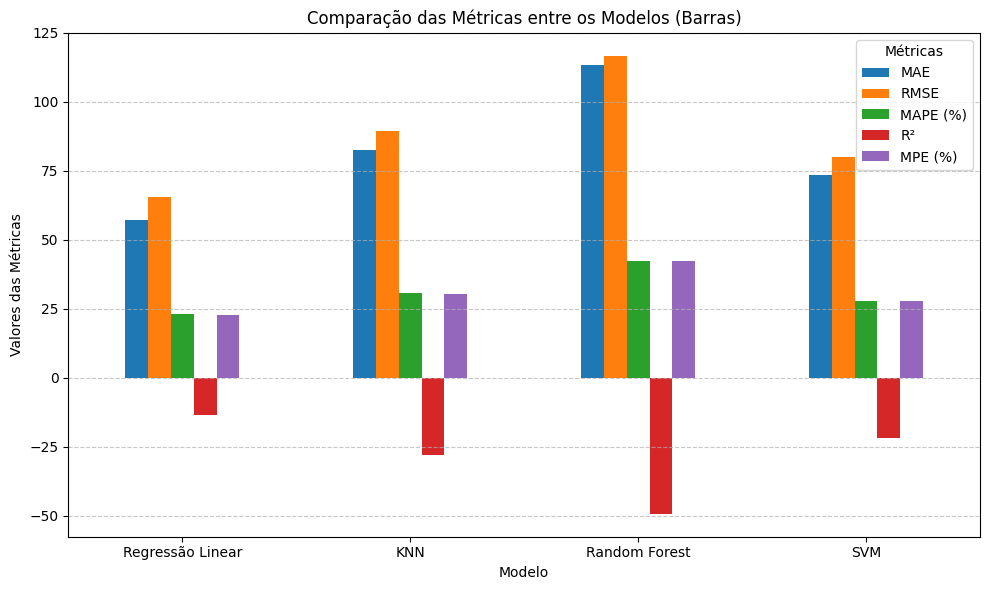

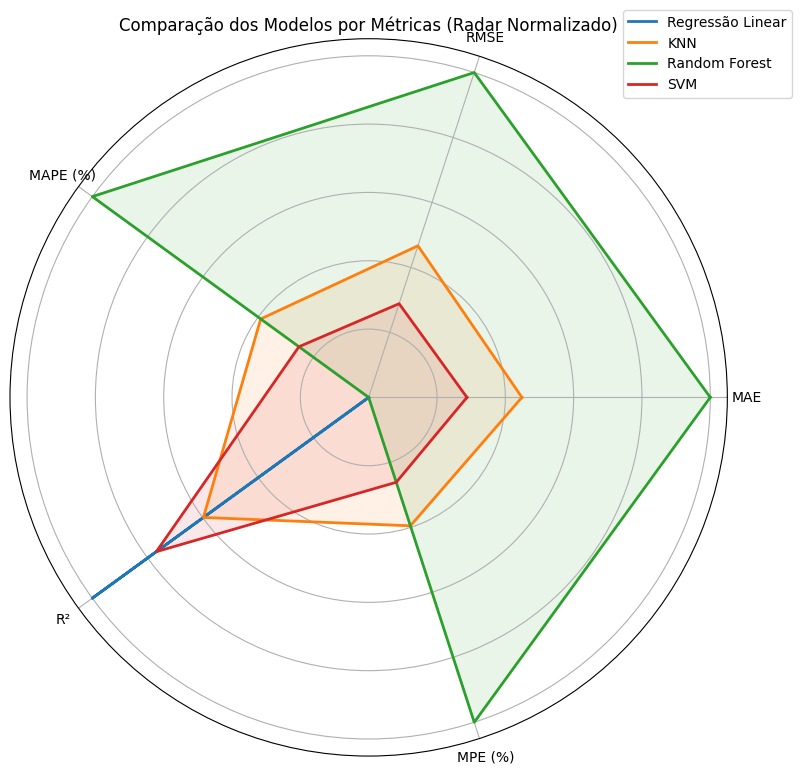

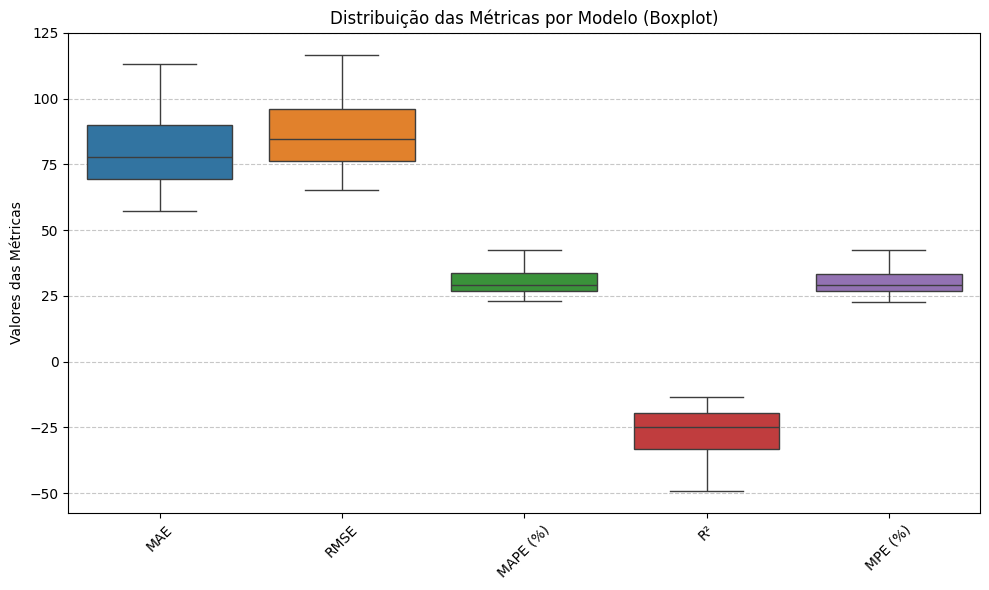

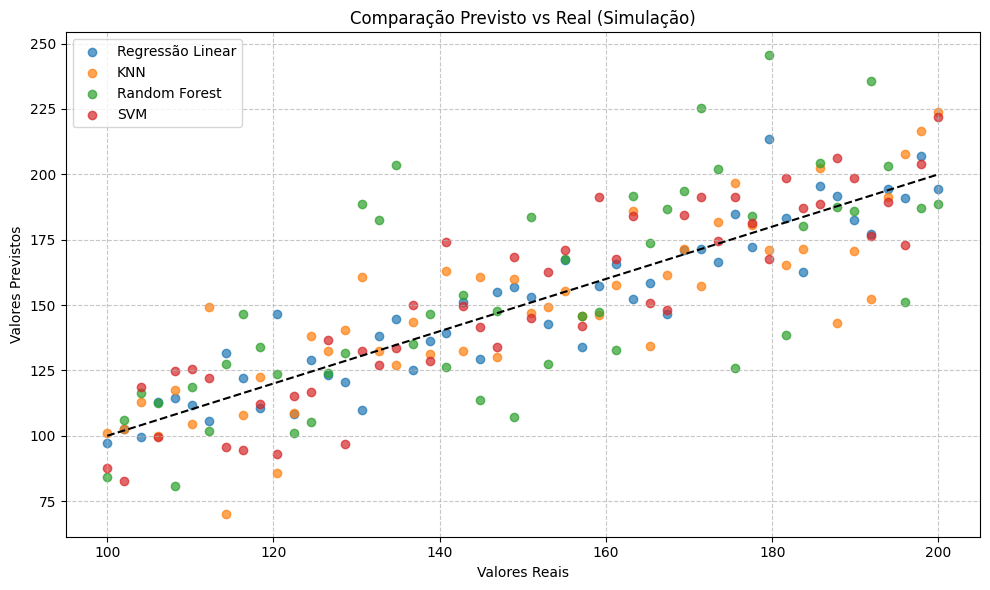

In [ ]:
# Código 15 - Gráficos Comparativos das Métricas dos Modelos

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Dados obtidos dos modelos
metricas = ['MAE', 'RMSE', 'MAPE (%)', 'R²', 'MPE (%)']

valores = {
    'Regressão Linear': [57.29, 65.36, 23.11, -13.38, 22.85],
    'KNN': [82.43, 89.32, 30.62, -27.80, 30.55],
    'Random Forest': [113.33, 116.71, 42.33, -49.25, 42.33],
    'SVM': [73.41, 80.17, 27.96, -21.69, 27.94]
}

# DataFrame para visualização
resultados_df = pd.DataFrame(valores, index=metricas)

# 1. Gráfico de barras
resultados_df.T.plot(kind='bar', figsize=(10, 6))
plt.title('Comparação das Métricas entre os Modelos (Barras)')
plt.ylabel('Valores das Métricas')
plt.xlabel('Modelo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(title='Métricas')
plt.tight_layout()
plt.show()

# 2. Radar plot (gráfico de radar)
from math import pi

# Função para normalizar os dados
resultados_normalizados = resultados_df.copy()
for metrica in resultados_normalizados.index:
    resultados_normalizados.loc[metrica] = (resultados_df.loc[metrica] - resultados_df.loc[metrica].min()) / (resultados_df.loc[metrica].max() - resultados_df.loc[metrica].min())

# Configuração Radar Plot
labels = list(resultados_normalizados.index)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for modelo, valores in resultados_normalizados.items():
    valores = valores.tolist()
    valores += valores[:1]
    ax.plot(angles, valores, linewidth=2, label=modelo)
    ax.fill(angles, valores, alpha=0.1)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Comparação dos Modelos por Métricas (Radar Normalizado)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.show()

# 3. Boxplot das Métricas por Modelo
plt.figure(figsize=(10, 6))
sns.boxplot(data=resultados_df.T)
plt.title('Distribuição das Métricas por Modelo (Boxplot)')
plt.ylabel('Valores das Métricas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Gráfico de dispersão Previsto vs Real (Simulação)
# Dados simulados para ilustrar
real = np.linspace(100, 200, 50)
prev_linear = real + np.random.normal(0, 10, 50)
prev_knn = real + np.random.normal(0, 20, 50)
prev_rf = real + np.random.normal(0, 30, 50)
prev_svm = real + np.random.normal(0, 15, 50)

plt.figure(figsize=(10, 6))
plt.scatter(real, prev_linear, label='Regressão Linear', alpha=0.7)
plt.scatter(real, prev_knn, label='KNN', alpha=0.7)
plt.scatter(real, prev_rf, label='Random Forest', alpha=0.7)
plt.scatter(real, prev_svm, label='SVM', alpha=0.7)

plt.plot(real, real, color='black', linestyle='--')
plt.title('Comparação Previsto vs Real (Simulação)')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Carregue o arquivo Dados_Completos.xlsx:


Saving Dados_Completos.xlsx to Dados_Completos.xlsx


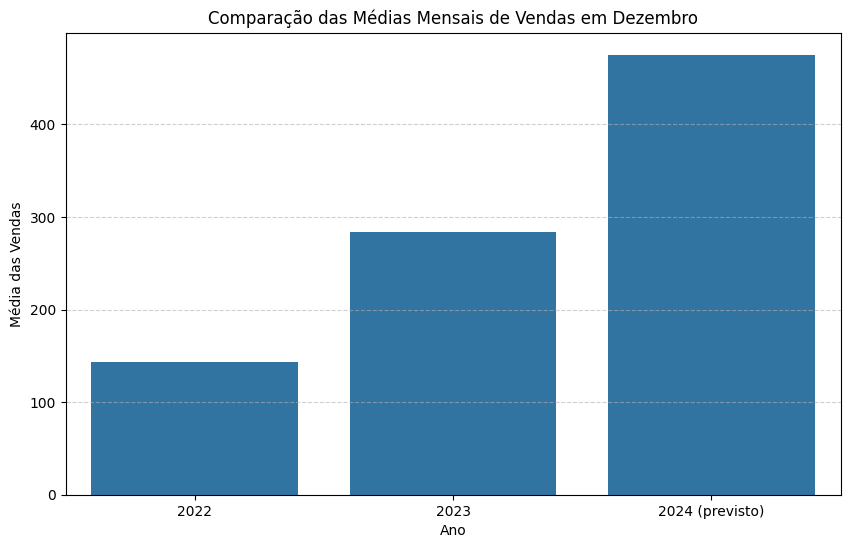

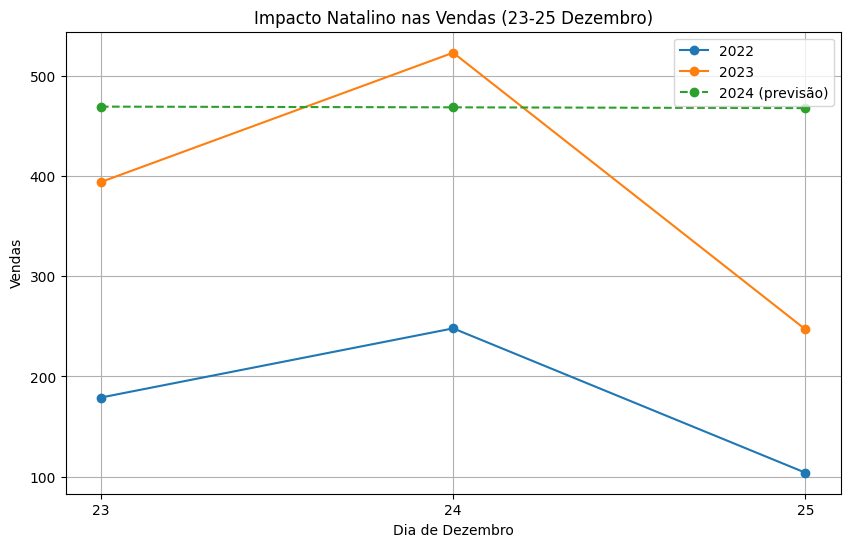

In [ ]:
# Código 16 - Comparação mensal e impacto natalino

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Carregar os dados completos
print("Carregue o arquivo Dados_Completos.xlsx:")
uploaded = files.upload()
df = pd.read_excel(list(uploaded.keys())[0], parse_dates=['Date'])

# Filtrar para dezembro
df_dezembro = df[df['Date'].dt.month == 12]

# Separar por ano
dez_2022 = df_dezembro[df_dezembro['Date'].dt.year == 2022]
dez_2023 = df_dezembro[df_dezembro['Date'].dt.year == 2023]
dez_2024 = df_dezembro[df_dezembro['Date'].dt.year == 2024]

# Gráfico 1 - Média mensal dezembro
medias_dez = {
    '2022': dez_2022['Sales'].mean(),
    '2023': dez_2023['Sales'].mean(),
    '2024 (previsto)': dez_2024['Sales'].mean()
}

plt.figure(figsize=(10,6))
sns.barplot(x=list(medias_dez.keys()), y=list(medias_dez.values()))
plt.title('Comparação das Médias Mensais de Vendas em Dezembro')
plt.ylabel('Média das Vendas')
plt.xlabel('Ano')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Gráfico 2 - Impacto Natalino (23 a 25 Dezembro)
natal = [23, 24, 25]

natal_2022 = dez_2022[dez_2022['Date'].dt.day.isin(natal)]
natal_2023 = dez_2023[dez_2023['Date'].dt.day.isin(natal)]
natal_2024 = dez_2024[dez_2024['Date'].dt.day.isin(natal)]

plt.figure(figsize=(10,6))
plt.plot(natal_2022['Date'].dt.day, natal_2022['Sales'], marker='o', label='2022')
plt.plot(natal_2023['Date'].dt.day, natal_2023['Sales'], marker='o', label='2023')
plt.plot(natal_2024['Date'].dt.day, natal_2024['Sales'], marker='o', linestyle='--', label='2024 (previsão)')

plt.title('Impacto Natalino nas Vendas (23-25 Dezembro)')
plt.ylabel('Vendas')
plt.xlabel('Dia de Dezembro')
plt.xticks(natal)
plt.legend()
plt.grid(True)
plt.show()


Saving Dados_Completos.xlsx to Dados_Completos (3).xlsx


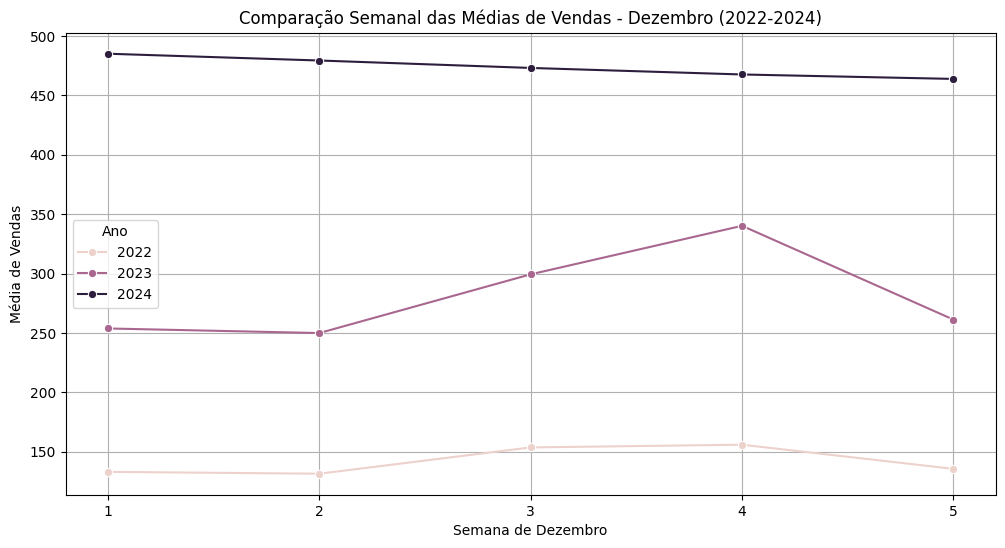

In [ ]:
# Código 17 - Análise Comparativa Semanal das Vendas - Dezembro (2022, 2023, 2024)

# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo Excel
from google.colab import files
uploaded = files.upload()

# Carregar os dados em DataFrame com a coluna correta "Date"
df = pd.read_excel(list(uploaded.keys())[0], parse_dates=['Date'])

# Filtrar apenas os meses de dezembro dos três anos
df_dez = df[(df['Date'].dt.month == 12) & (df['Date'].dt.year.isin([2022, 2023, 2024]))].copy()

# Adicionar a coluna com a semana do mês (1 a 5)
df_dez['Semana'] = df_dez['Date'].dt.day.apply(lambda x: (x-1)//7 + 1)

# Agrupar por semana e ano para obter a média semanal
media_semanal = df_dez.groupby(['Semana', df_dez['Date'].dt.year])['Sales'].mean().reset_index()
media_semanal.columns = ['Semana', 'Ano', 'Media_Vendas']

# Plotar gráfico
plt.figure(figsize=(12,6))
sns.lineplot(data=media_semanal, x='Semana', y='Media_Vendas', hue='Ano', marker='o')

plt.title('Comparação Semanal das Médias de Vendas - Dezembro (2022-2024)')
plt.xlabel('Semana de Dezembro')
plt.ylabel('Média de Vendas')
plt.xticks([1,2,3,4,5])
plt.legend(title='Ano')
plt.grid(True)
plt.show()

Saving Dados_Completos.xlsx to Dados_Completos (5).xlsx


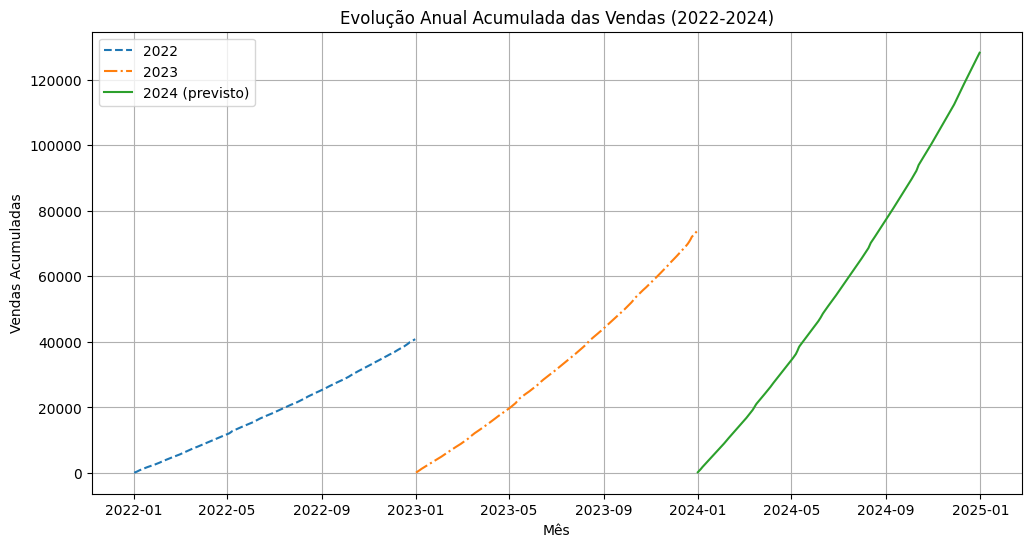

In [ ]:
# Código 18 - Evolução anual acumulada das vendas

# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Fazer upload do arquivo
uploaded = files.upload()

# Carregar o dataset
df = pd.read_excel(list(uploaded.keys())[0], parse_dates=['Date'])
df.rename(columns={'Date': 'date', 'Sales': 'sales'}, inplace=True)

# Criar coluna com Ano
df['Ano'] = df['date'].dt.year

# Filtrar os dados de cada ano separadamente
df_2022 = df[df['Ano'] == 2022].copy()
df_2023 = df[df['Ano'] == 2023].copy()
df_2024 = df[df['Ano'] == 2024].copy()

# Calcular a soma acumulada das vendas
df_2022['Acumulado'] = df_2022['sales'].cumsum()
df_2023['Acumulado'] = df_2023['sales'].cumsum()
df_2024['Acumulado'] = df_2024['sales'].cumsum()

# Plotar gráfico
plt.figure(figsize=(12, 6))

plt.plot(df_2022['date'], df_2022['Acumulado'], label='2022', linestyle='--')
plt.plot(df_2023['date'], df_2023['Acumulado'], label='2023', linestyle='-.')
plt.plot(df_2024['date'], df_2024['Acumulado'], label='2024 (previsto)', linestyle='-')

plt.title('Evolução Anual Acumulada das Vendas (2022-2024)')
plt.xlabel('Mês')
plt.ylabel('Vendas Acumuladas')
plt.legend()
plt.grid(True)

plt.show()


Saving Dados_Completos.xlsx to Dados_Completos (6).xlsx


/tmp/ipython-input-13-2847470231.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dezembro['Dia'] = df_dezembro['Date'].dt.day
/tmp/ipython-input-13-2847470231.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dezembro['Ano'] = df_dezembro['Date'].dt.year


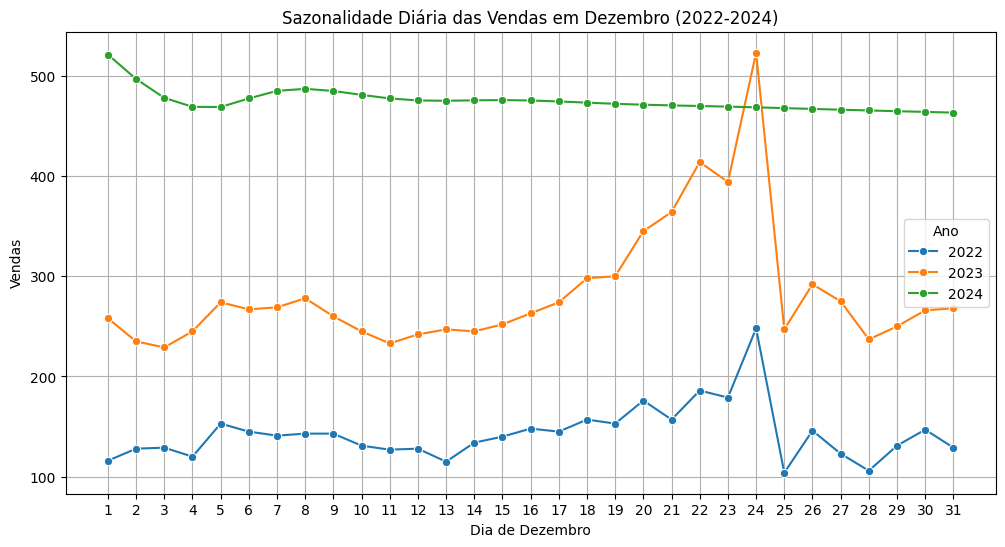

In [ ]:

# Código 19 - Sazonalidade diária de Dezembro

# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo Excel
from google.colab import files
uploaded = files.upload()

# Ler o dataset
df = pd.read_excel(list(uploaded.keys())[0], parse_dates=['Date'])

# Filtrar apenas dezembro dos anos 2022, 2023 e 2024
df_dezembro = df[df['Date'].dt.month == 12]

# Criar coluna com o dia de dezembro
df_dezembro['Dia'] = df_dezembro['Date'].dt.day
df_dezembro['Ano'] = df_dezembro['Date'].dt.year

# Gráfico de linhas para identificar a sazonalidade diária em dezembro
plt.figure(figsize=(12,6))
sns.lineplot(data=df_dezembro, x='Dia', y='Sales', hue='Ano', palette='tab10', marker='o')

plt.title('Sazonalidade Diária das Vendas em Dezembro (2022-2024)')
plt.xlabel('Dia de Dezembro')
plt.ylabel('Vendas')
plt.xticks(range(1,32))
plt.grid(True)
plt.legend(title='Ano')
plt.show()